In [1]:
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools
import os

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [3]:
TRAin_DATA_FOLDER= "../input/train"

In [4]:
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)

In [5]:
len(images)

4750

In [6]:
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res

In [7]:
images = [resize_images(img) for img in images]


In [8]:
images[0].shape

(256, 256, 3)

In [9]:
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))


images shape:  (4750, 256, 256, 3)
classes shape:  (4750,)
number of Loose Silky-bent images is  -> 654
number of Small-flowered Cranesbill images is  -> 496
number of Fat Hen images is  -> 475
number of Black-grass images is  -> 263
number of Charlock images is  -> 390
number of Common wheat images is  -> 221
number of Scentless Mayweed images is  -> 516
number of Maize images is  -> 221
number of Sugar beet images is  -> 385
number of Shepherds Purse images is  -> 231
number of Cleavers images is  -> 287
number of Common Chickweed images is  -> 611


Text(0.5,0.98,'Categorical Plotting')

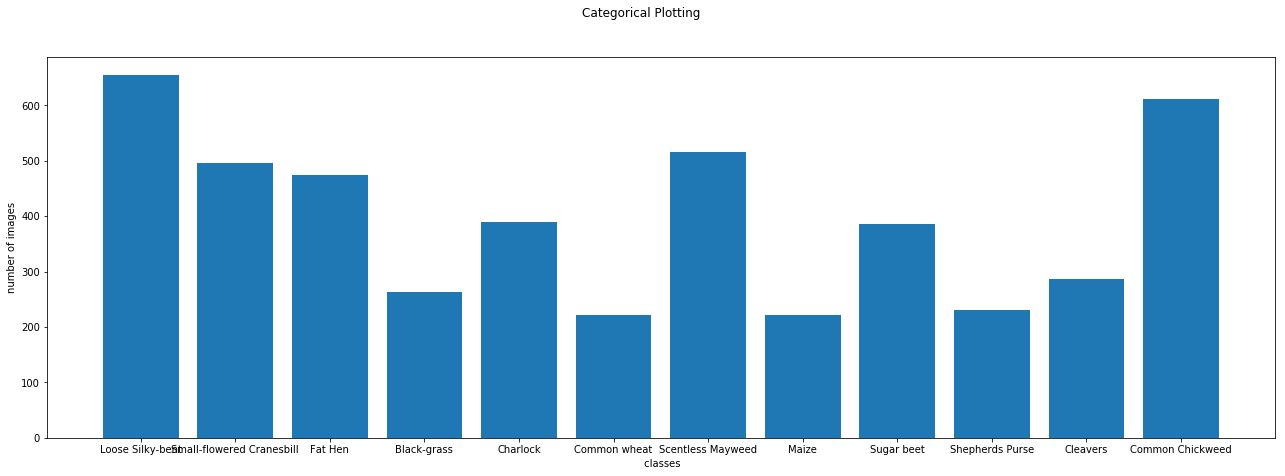

In [10]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

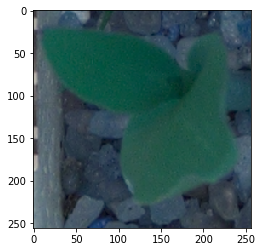

In [12]:
plt.imshow(images[50])

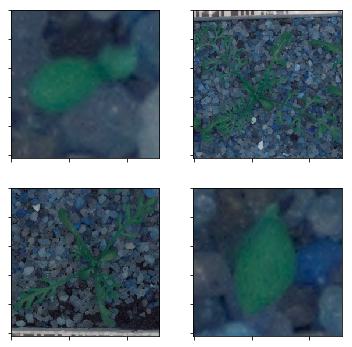

In [11]:
def plot_for_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Scentless Mayweed")

In [12]:

img = cv2.imread("train/Scentless Mayweed/1300c3cd9.png")


In [13]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

In [14]:
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

In [15]:
for indx, image in enumerate(images):
  try:
     images[indx] = segment(image)
      
  except:
    print(indx)
    continue

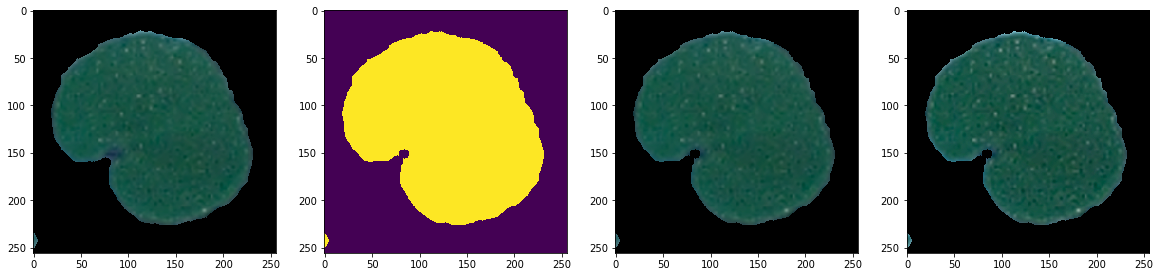

In [16]:
image = images[classes == "Small-flowered Cranesbill"][40]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)


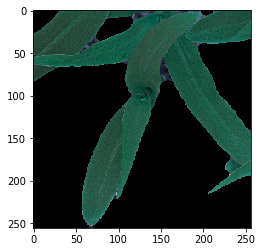

In [17]:
plt.imshow(images[0])

In [18]:
images.shape

(4750, 256, 256, 3)

In [19]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [20]:
y.shape

(4750, 12)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)

In [22]:
X_train.shape

(3325, 256, 256, 3)

In [51]:
X_train[0].shape

(256, 256, 3)

In [23]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [24]:
print(X_test.shape)
print(X_val.shape)

(712, 256, 256, 3)
(713, 256, 256, 3)


In [25]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))
model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()



Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      2432      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                3084      
Total params: 13,964
Trainable params: 13,964
Non-trainable params: 0
_________________________________________________________________


In [26]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [27]:
model.fit(X_train, y_train, epochs = 15, validation_data = (X_val,Y_val),batch_size = batch_size)

Train on 3325 samples, validate on 713 samples
Epoch 1/15
3325/3325 [==============================] - 12s 4ms/step - loss: 12.4128 - acc: 0.1275 - val_loss: 3.5846 - val_acc: 0.1992
Epoch 2/15
3325/3325 [==============================] - 10s 3ms/step - loss: 2.9133 - acc: 0.1465 - val_loss: 2.3430 - val_acc: 0.1851
Epoch 3/15
3325/3325 [==============================] - 10s 3ms/step - loss: 2.3493 - acc: 0.1808 - val_loss: 2.1682 - val_acc: 0.2062
Epoch 4/15
3325/3325 [==============================] - 10s 3ms/step - loss: 2.1665 - acc: 0.2469 - val_loss: 1.9495 - val_acc: 0.3058
Epoch 5/15
3325/3325 [==============================] - 10s 3ms/step - loss: 2.0643 - acc: 0.2719 - val_loss: 1.8925 - val_acc: 0.3100
Epoch 6/15
3325/3325 [==============================] - 10s 3ms/step - loss: 1.9925 - acc: 0.2803 - val_loss: 1.8234 - val_acc: 0.3268
Epoch 7/15
3325/3325 [==============================] - 10s 3ms/step - loss: 1.9444 - acc: 0.3116 - val_loss: 1.7869 - val_acc: 0.3647
Epoch 8

In [28]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.6496853429949685
Test accuracy: 0.40589887740906705


In [30]:
X_test.shape

(712, 256, 256, 3)

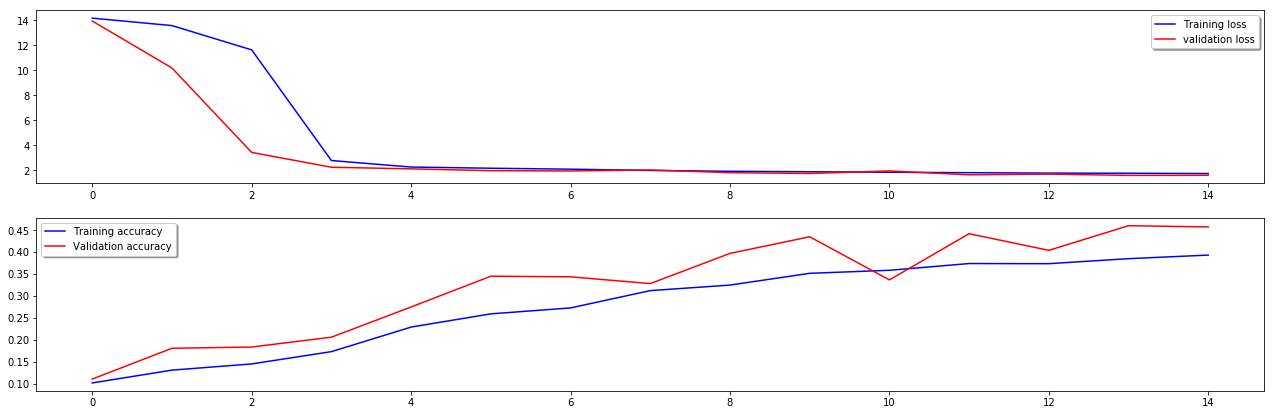

In [42]:
# Benchmark model visualization
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(model.history.history['loss'], color='b', label="Training loss")
ax[0].plot(model.history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model.history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(model.history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [67]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 256, 256, 32)      2432      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 64)        0         
__________

In [68]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [69]:
model.fit(X_train, y_train, epochs = 25, validation_data = (X_val,Y_val),batch_size = batch_size)

Train on 3325 samples, validate on 713 samples
Epoch 1/25
3325/3325 [==============================] - 54s 16ms/step - loss: 6.5737 - acc: 0.1155 - val_loss: 2.4343 - val_acc: 0.1248
Epoch 2/25
3325/3325 [==============================] - 47s 14ms/step - loss: 2.3837 - acc: 0.1765 - val_loss: 2.2264 - val_acc: 0.2637
Epoch 3/25
3325/3325 [==============================] - 47s 14ms/step - loss: 2.1493 - acc: 0.2310 - val_loss: 2.0084 - val_acc: 0.2749
Epoch 4/25
3325/3325 [==============================] - 47s 14ms/step - loss: 2.0398 - acc: 0.2571 - val_loss: 2.0123 - val_acc: 0.2679
Epoch 5/25
3325/3325 [==============================] - 47s 14ms/step - loss: 1.9376 - acc: 0.2767 - val_loss: 1.9573 - val_acc: 0.3296
Epoch 6/25
3325/3325 [==============================] - 47s 14ms/step - loss: 1.8517 - acc: 0.3128 - val_loss: 1.9051 - val_acc: 0.3170
Epoch 7/25
3325/3325 [==============================] - 47s 14ms/step - loss: 1.7363 - acc: 0.3678 - val_loss: 1.6364 - val_acc: 0.4783
E

In [70]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7555083197154356
Test accuracy: 0.7471910129102428


In [71]:
X_test.shape

(712, 256, 256, 3)

In [72]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30
batch_size = 38

In [73]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [74]:
X_train, X_test, y_train, y_test
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 64s - loss: 0.7628 - acc: 0.7384 - val_loss: 1.3824 - val_acc: 0.5372
Epoch 2/30
 - 63s - loss: 0.7204 - acc: 0.7465 - val_loss: 0.6501 - val_acc: 0.7742
Epoch 3/30
 - 62s - loss: 0.7029 - acc: 0.7529 - val_loss: 0.8156 - val_acc: 0.7237
Epoch 4/30
 - 62s - loss: 0.7146 - acc: 0.7562 - val_loss: 0.7530 - val_acc: 0.7475
Epoch 5/30
 - 62s - loss: 0.6961 - acc: 0.7619 - val_loss: 0.8193 - val_acc: 0.6957

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/30
 - 61s - loss: 0.5758 - acc: 0.7913 - val_loss: 0.6264 - val_acc: 0.7826
Epoch 7/30
 - 61s - loss: 0.5286 - acc: 0.8155 - val_loss: 0.6598 - val_acc: 0.7644
Epoch 8/30
 - 61s - loss: 0.5266 - acc: 0.8152 - val_loss: 0.6562 - val_acc: 0.7686
Epoch 9/30
 - 61s - loss: 0.4938 - acc: 0.8240 - val_loss: 0.6443 - val_acc: 0.7630

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 10/30
 - 61s - loss: 0.4527 - acc: 0.8412 - val_loss: 0.6135 - val_acc: 0.78

In [77]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = None)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

Test loss: 49.657825405678054
Test accuracy: 82.58426966292134


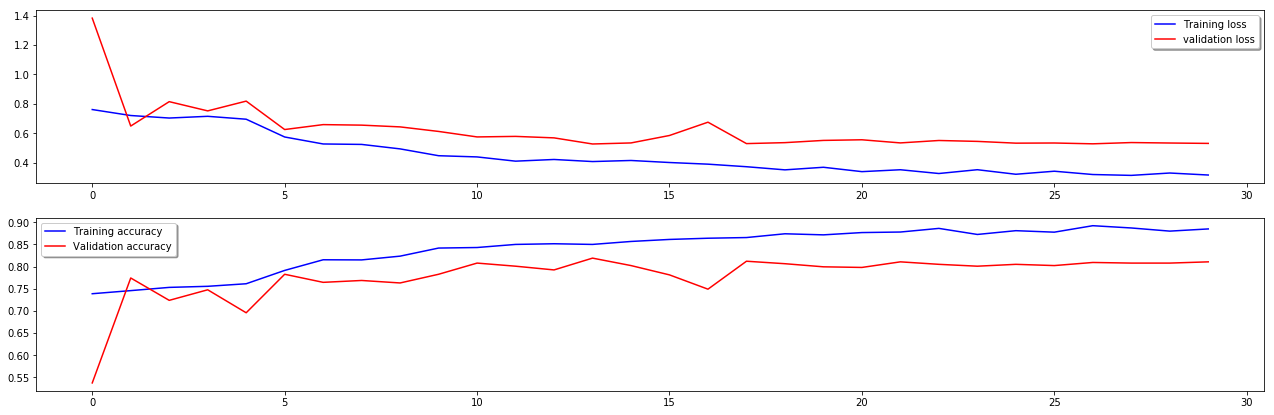

In [76]:
#visualization
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)